<a href="https://colab.research.google.com/github/Yutong-Lu/CHL5230FinalProject/blob/main/NLP_cleaning_and_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times

In [2]:
# Read the data from a CSV file named "covid_vaccine.csv" into a DataFrame
df = pd.read_csv("5-CHL5230-F23 NLP - Sheet1.csv", encoding='ISO-8859-1').astype(str)

# Clean column names
df.columns = ['title', 'abstract', 'discussion']

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

df.dtypes

title         object
abstract      object
discussion    object
dtype: object

In [4]:
! pip install contractions
import contractions

# Expand contractions in the 'abstract' and 'discussion' columns
df['abstract_expanded'] = df['abstract'].apply(lambda x: contractions.fix(x))
df['discussion_expanded'] = df['discussion'].apply(lambda x: contractions.fix(x))

df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.5 MB/s eta 0:00:00


,title,abstract,discussion,abstract_expanded,discussion_expanded
0,Predicting Type 2 Diabetes Using Logistic Regr...,Diabetes mellitus is one of the most common hu...,Diabetes has become one of the leading causes ...,Diabetes mellitus is one of the most common hu...,Diabetes has become one of the leading causes ...
1,Machine Learning Methods to Predict Diabetes C...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...
2,Predicting youth diabetes risk using NHANES da...,Prediabetes and diabetes mellitus (preDM/DM) h...,The recently increasing prevalence of preDM/DM...,Prediabetes and diabetes mellitus (preDM/DM) h...,The recently increasing prevalence of preDM/DM...
3,Accuracy of Machine Learning Classification Mo...,Soft-computing and statistical learning models...,"4.1. Synopsis of Evidence\n In recent years, i...",Soft-computing and statistical learning models...,"4.1. Synopsis of Evidence\n In recent years, i..."
4,Cardiovascular complications in a diabetes pre...,Prediction model has been the focus of studies...,This review identified ten machine learning mo...,Prediction model has been the focus of studies...,This review identified ten machine learning mo...


In [5]:
# Let's perform some basic data cleaning tasks such as:
# - Lowercasing the texts
# - Removing URLs
# - Removing special characters and numbers

# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df['title'] = df['title'].str.lower()

df['abstract'] = df['abstract_expanded'].str.lower()
df['abstract'] = df['abstract'].apply(remove_url)
df['abstract'] = df['abstract'].apply(remove_special_characters)

df['discussion'] = df['discussion_expanded'].str.lower()
df['discussion'] = df['discussion'].apply(remove_url)
df['discussion'] = df['discussion'].apply(remove_special_characters)

df.head()

,title,abstract,discussion,abstract_expanded,discussion_expanded
0,predicting type 2 diabetes using logistic regr...,diabetes mellitus is one of the most common hu...,diabetes has become one of the leading causes ...,Diabetes mellitus is one of the most common hu...,Diabetes has become one of the leading causes ...
1,machine learning methods to predict diabetes c...,one of the areas where artificial intelligence...,this work describes the application of a moder...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...
2,predicting youth diabetes risk using nhanes da...,prediabetes and diabetes mellitus predmdm have...,the recently increasing prevalence of predmdm ...,Prediabetes and diabetes mellitus (preDM/DM) h...,The recently increasing prevalence of preDM/DM...
3,accuracy of machine learning classification mo...,softcomputing and statistical learning models ...,synopsis of evidence\n in recent years inform...,Soft-computing and statistical learning models...,"4.1. Synopsis of Evidence\n In recent years, i..."
4,cardiovascular complications in a diabetes pre...,prediction model has been the focus of studies...,this review identified ten machine learning mo...,Prediction model has been the focus of studies...,This review identified ten machine learning mo...


Tokenization

In [6]:
# !pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
def tokenize_text(text):
   return word_tokenize(text)

In [8]:
df['title_tokens'] = df['title'].apply(tokenize_text)
df['abstract_tokens'] = df['abstract'].apply(tokenize_text)
df['discussion_tokens'] = df['discussion'].apply(tokenize_text)

df.head()
# after this step, the word tdm appeared in abstract tokens and discussion tokens

,title,abstract,discussion,abstract_expanded,discussion_expanded,title_tokens,abstract_tokens,discussion_tokens
0,predicting type 2 diabetes using logistic regr...,diabetes mellitus is one of the most common hu...,diabetes has become one of the leading causes ...,Diabetes mellitus is one of the most common hu...,Diabetes has become one of the leading causes ...,"[predicting, type, 2, diabetes, using, logisti...","[diabetes, mellitus, is, one, of, the, most, c...","[diabetes, has, become, one, of, the, leading,..."
1,machine learning methods to predict diabetes c...,one of the areas where artificial intelligence...,this work describes the application of a moder...,One of the areas where Artificial Intelligence...,This work describes the application of a moder...,"[machine, learning, methods, to, predict, diab...","[one, of, the, areas, where, artificial, intel...","[this, work, describes, the, application, of, ..."
2,predicting youth diabetes risk using nhanes da...,prediabetes and diabetes mellitus predmdm have...,the recently increasing prevalence of predmdm ...,Prediabetes and diabetes mellitus (preDM/DM) h...,The recently increasing prevalence of preDM/DM...,"[predicting, youth, diabetes, risk, using, nha...","[prediabetes, and, diabetes, mellitus, predmdm...","[the, recently, increasing, prevalence, of, pr..."
3,accuracy of machine learning classification mo...,softcomputing and statistical learning models ...,synopsis of evidence\n in recent years inform...,Soft-computing and statistical learning models...,"4.1. Synopsis of Evidence\n In recent years, i...","[accuracy, of, machine, learning, classificati...","[softcomputing, and, statistical, learning, mo...","[synopsis, of, evidence, in, recent, years, in..."
4,cardiovascular complications in a diabetes pre...,prediction model has been the focus of studies...,this review identified ten machine learning mo...,Prediction model has been the focus of studies...,This review identified ten machine learning mo...,"[cardiovascular, complications, in, a, diabete...","[prediction, model, has, been, the, focus, of,...","[this, review, identified, ten, machine, learn..."


Stop words

In [9]:
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['title_tokens_no_stop'] = df['title_tokens'].apply(remove_stop_words)
df['abstract_tokens_no_stop'] = df['abstract_tokens'].apply(remove_stop_words)
df['discussion_tokens_no_stop'] = df['discussion_tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['title', 'title_tokens', 'title_tokens_no_stop']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,title_tokens,title_tokens_no_stop
0,predicting type 2 diabetes using logistic regr...,"[predicting, type, 2, diabetes, using, logisti...","[predicting, type, 2, diabetes, using, logisti..."
1,machine learning methods to predict diabetes c...,"[machine, learning, methods, to, predict, diab...","[machine, learning, methods, predict, diabetes..."
2,predicting youth diabetes risk using nhanes da...,"[predicting, youth, diabetes, risk, using, nha...","[predicting, youth, diabetes, risk, using, nha..."
3,accuracy of machine learning classification mo...,"[accuracy, of, machine, learning, classificati...","[accuracy, machine, learning, classification, ..."
4,cardiovascular complications in a diabetes pre...,"[cardiovascular, complications, in, a, diabete...","[cardiovascular, complications, diabetes, pred..."


Create word cloud

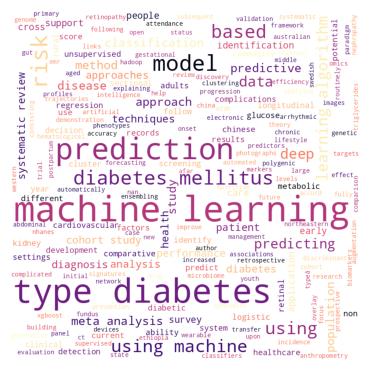

In [10]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# world cloud for title

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
all_tokens = sum(df['title_tokens_no_stop'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

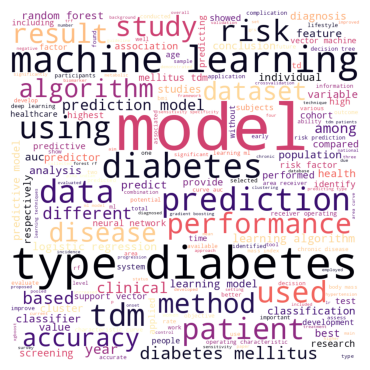

In [11]:
# world cloud for abstract

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
all_tokens = sum(df['abstract_tokens_no_stop'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

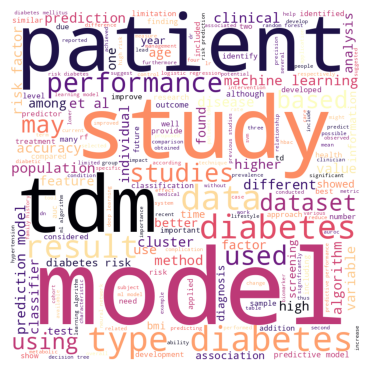

In [12]:
# world cloud for discussion

all_tokens = sum(df['discussion_tokens_no_stop'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['title_lemmatized'] = df['title_tokens_no_stop'].apply(lemmatize_tokens_with_pos)
df['abstract_lemmatized'] = df['abstract_tokens_no_stop'].apply(lemmatize_tokens_with_pos)
df['discussion_lemmatized'] = df['discussion_tokens_no_stop'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Word cloud after lemmatization

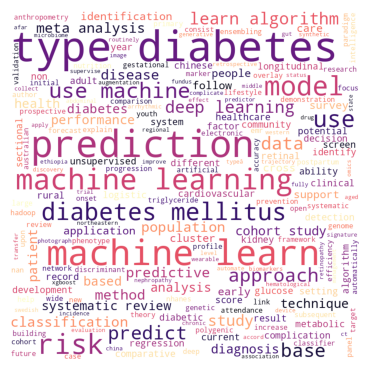

In [14]:
# word cloud for title, abstract and discussion

# Combine all tokens from the 'tokens_no_stop_context' column into a single list
all_tokens = sum(df['title_lemmatized'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

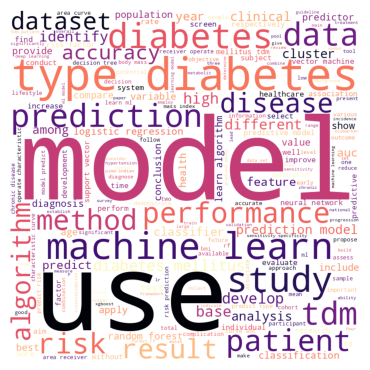

In [15]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
all_tokens = sum(df['abstract_lemmatized'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

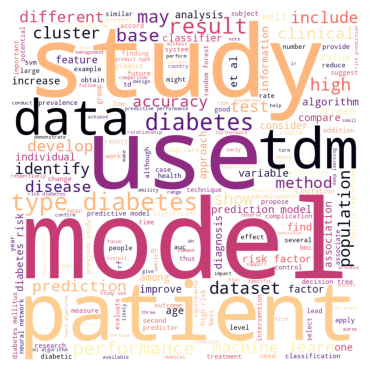

In [16]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
all_tokens = sum(df['discussion_lemmatized'].tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# tdm is tokenized T2DM (type 2 diabetes mellitus)